In [66]:
import pandas as pd
import json
import yaml

In [67]:
def preprocess():
    pass

In [68]:
stations = pd.read_csv("../project/data/dwd/stations.tsv", sep="\t")

#remove stations with empty Beginn or Ende
mask = stations["Beginn"] == " "
stations = stations[~mask]
mask = stations["Ende"] == " "
stations = stations[~mask]

stations["Beginn"] = pd.to_datetime(stations["Beginn"], dayfirst=True)
stations["Ende"] = pd.to_datetime(stations["Ende"], dayfirst=True)

stations.head()

,Stationsname,Stations_ID,Kennung,Stations-kennung,Breite,Länge,Stations-höhe,Flussgebiet,Bundesland,Beginn,Ende
0,Aach,1,KL,02783,47.8410,8.8490,478,,BW,1937-01-01,1986-06-30
1,Aach,1,RR,70191,47.8410,8.8490,478,,BW,1912-01-01,1986-06-30
2,Aach/Hegau,10771,PE,10771,47.8500,8.8500,480,,BW,1951-02-27,2000-06-15
3,Aachen,3,EB,02205,50.7827,6.0941,202,803100,NW,1951-01-01,2011-03-31
4,Aachen,3,FF,02205,50.7827,6.0941,202,803100,NW,1937-01-01,2011-03-31


In [69]:
from datetime import datetime
bw_stations = stations.loc[stations["Bundesland"] == "BW"].drop_duplicates(subset= ["Stationsname", "Stations-kennung"])

current_bw_stations = bw_stations[bw_stations["Ende"] >= datetime(day=2, month=12, year=2023)]
id_str = current_bw_stations["Stations-kennung"].to_string(index=False).replace("\n ", ",")

In [70]:
import requests

# repsonse = requests.get(f'https://dwd.api.proxy.bund.dev/v30/stationOverviewExtended?stationIds={id_str}')

In [71]:

# content = json.loads(repsonse.content.decode("utf-8"))
# response_ids = content.keys()

# bw_response_stations = current_bw_stations[current_bw_stations["Stations-kennung"].isin(response_ids)]
a = ["Q771",  "Q411",  "Q740",  "Q055",  "Q811",  "Q824",  "Q382",  "Q712",  "Q702",  "Q221",  "Q978",  "Q848",  "Q351",  "Q651",  "Q485",  "Q292",  "Q579",  "Q887",  "Q671",  "Q437",  "Q061",  "Q242",  "Q518",  "Q332",  "Q864",  "Q440",  "Q404",  "Q733",  "Q341",  "Q378",  "Q788",  "Q942",  "Q738",  "Q879",  "Q622",  "Q926"]
bw_response_stations = current_bw_stations[current_bw_stations["Stations-kennung"].isin(a)]

In [72]:
# response = requests.get("http://my.meteoblue.com/packages/basic-1h_basic-day?lat=47.558&lon=7.573&apikey=DEMOKEY")
# response.content

/tmp/ipykernel_7567/2725097648.py:12: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

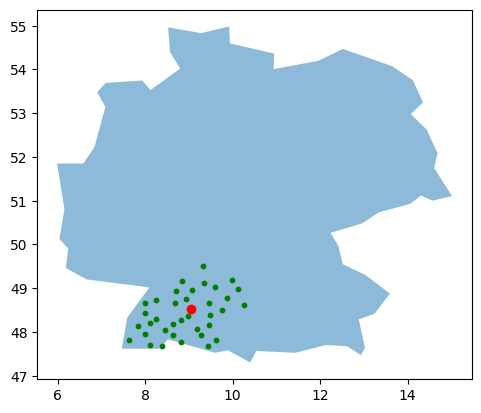

In [73]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt


geometry = [Point(xy) for xy in zip(bw_response_stations['Länge'], bw_response_stations['Breite'])]
gdf = GeoDataFrame(bw_response_stations, geometry=geometry)
tübingen = GeoDataFrame(geometry=[Point([9.057645 ,48.521637])])
#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
germany = world[world["name"] == "Germany"]

fig, ax = plt.subplots()

germany.plot(
    ax=ax,
    alpha=0.5
)
gdf.plot(ax=ax, color="g", markersize=10)
tübingen.plot(ax=ax, color="r")

get lat lon coords of stations

In [74]:
import numpy as np
np.stack([bw_response_stations['Länge'], bw_response_stations['Breite']]).T.tolist()

[[9.46, 48.148],
 [8.246, 48.727],
 [8.813, 48.264],
 [9.321, 49.518],
 [7.998, 47.963],
 [8.106, 47.7],
 [10.131, 48.99],
 [8.109, 48.201],
 [7.835, 48.138],
 [8.848, 49.166],
 [9.441, 47.685],
 [8.647, 47.924],
 [9.603, 49.021],
 [8.98, 48.375],
 [10.267, 48.61],
 [9.98, 49.18],
 [9.764, 48.512],
 [7.639, 47.806],
 [9.484, 48.385],
 [8.68, 48.652],
 [9.463, 48.671],
 [9.353, 49.128],
 [7.993, 48.433],
 [8.697, 48.933],
 [9.287, 47.935],
 [8.924, 48.743],
 [7.994, 48.67],
 [8.636, 48.182],
 [9.071, 48.957],
 [9.874, 48.77],
 [9.194, 48.072],
 [8.822, 47.774],
 [8.461, 48.045],
 [9.621, 47.806],
 [8.239, 48.295],
 [8.38, 47.678]]

In [83]:
with open("../project/config/crawler.config.yaml", "r") as file:
    d = yaml.safe_load(file)



48.148

In [95]:
response = requests.get("https://my.meteoblue.com/packages/basic-1h_basic-day?apikey=akDpC43URINvoYBG&lat=48.5227&lon=9.05222&asl=333&format=json")

In [96]:
response.content

b'{"error_message":"Available credits exceeded for this API key","error":true}'